In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import random
from os import listdir
%matplotlib inline
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model, Sequential
from keras.layers import *
import keras.backend as K
import keras.optimizers as Optimizers
import keras.callbacks

C:\Users\Rock_\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# CNN

In [2]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    random.shuffle(dir_list)
    for name in dir_list:
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [3]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 294


In [4]:
#Normalise images
images = np.array(images)
images /= 255.0

In [5]:
#convert datas to dummyvalues
labels_loc = np.array(pd.get_dummies(labels_loc))

(array([1, 0, 0, 0, 0], dtype=uint8),
 <matplotlib.image.AxesImage at 0x2794cf4e048>)

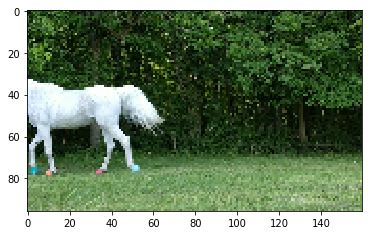

In [6]:
labels_loc[42], plt.imshow(images[42])

In [7]:
#from keras.models import load_model
#model = load_model("model.h5")

In [10]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(96, 160, 3), name='img_in')
x = img_in

x = Convolution2D(2, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Convolution2D(4, (5,5), strides=(2,2), use_bias=False)(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
#x = Convolution2D(8, (5,5), strides=(2,2), use_bias=False)(x)       
#x = BatchNormalization()(x)
#x = Activation("relu")(x)
#x = Dropout(.5)(x)

x = Flatten(name='flattened')(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 96, 160, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 78, 2)         150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 78, 2)         8         
_________________________________________________________________
activation_1 (Activation)    (None, 46, 78, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 37, 4)         200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 21, 37, 4)         16        
_________________________________________________________________
activation_2 (Activation)    (None, 21, 37, 4)         0         
__________

In [38]:
model_name="model_CNN.h5"

In [39]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [43]:
h = model.fit(images, labels_loc, batch_size=64, epochs=10, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 235 samples, validate on 59 samples
Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.2036 - acc: 0.9532 - val_loss: 0.1514 - val_acc: 0.9831

Epoch 00001: val_loss improved from 0.22486 to 0.15144, saving model to model_CNN.h5
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1595 - acc: 0.9745 - val_loss: 0.1842 - val_acc: 1.0000

Epoch 00002: val_loss did not improve
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.1417 - acc: 0.9957 - val_loss: 0.1945 - val_acc: 0.9831

Epoch 00003: val_loss did not improve
Epoch 4/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1378 - acc: 0.9872 - val_loss: 0.2682 - val_acc: 0.9661

Epoch 00004: val_loss did not improve
Epoch 5/10
235/235 [==============================] - 2s 9ms/step - loss: 0.1339 - acc: 0.9915 - val_loss: 0.1754 - val_acc: 0.9661

Epoch 00005: val_loss did not improve
Epoch 6/10
235/235 [==============================] -

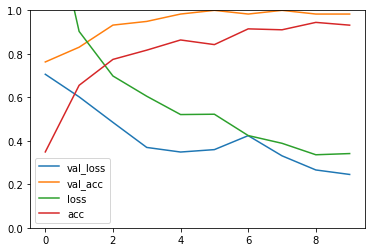

In [41]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))

## RNN

In [11]:
def load_photos(directory):
    images = []
    labels_loc = []
    dir_list = listdir(directory)
    for name in sorted(dir_list, key=lambda name : name.split("_")[1].split(".png")[0]):
        filename = directory + '/' + name
        # load an image from file
        image = load_img(filename, target_size=(96, 160))
        # convert the image pixels to a numpy array
        image = img_to_array(image)
        # get image id + labels
        value_loc = float(name.split('_')[0])
        labels_loc.append(int(value_loc))
        images.append(image)
    return images, labels_loc

In [12]:
dataset = "Datas/"

# load images from both train and test groups
directory = dataset+'Train'
images, labels_loc = load_photos(directory)
nb_images = len(images)
print('Loaded Images and labels for training: %d' % nb_images)

Loaded Images and labels for training: 294


In [13]:
#Normalise images
images = np.array(images)
images /= 255.0

In [14]:
win_size = 10

images_seq = []
labels_loc_seq =[]

for i, image in enumerate(images):
    if len(images) > i + win_size:
        images_seq.append(images[i:i + win_size])
        
for i, label_loc in enumerate(labels_loc):
    if len(labels_loc) > i + win_size:
        labels_loc_seq.append(labels_loc[i+win_size])  

In [15]:
images_seq = np.array(images_seq)
labels_loc_seq = np.array(pd.get_dummies(labels_loc_seq))
images_seq.shape, labels_loc_seq.shape, images_seq, labels_loc_seq

((284, 10, 96, 160, 3),
 (284, 5),
 array([[[[[0.23529412, 0.35686275, 0.15294118],
           [0.2784314 , 0.42352942, 0.21176471],
           [0.34901962, 0.5411765 , 0.32941177],
           ...,
           [0.23529412, 0.39607844, 0.16862746],
           [0.07843138, 0.24313726, 0.01960784],
           [0.19215687, 0.31764707, 0.11764706]],
 
          [[0.15294118, 0.3137255 , 0.02745098],
           [0.        , 0.11372549, 0.        ],
           [0.21960784, 0.35686275, 0.14117648],
           ...,
           [0.10980392, 0.19607843, 0.0627451 ],
           [0.21960784, 0.37254903, 0.15294118],
           [0.14901961, 0.2901961 , 0.07450981]],
 
          [[0.18039216, 0.26666668, 0.10588235],
           [0.02352941, 0.13333334, 0.        ],
           [0.09803922, 0.20784314, 0.05098039],
           ...,
           [0.18431373, 0.3529412 , 0.10588235],
           [0.17254902, 0.34509805, 0.09411765],
           [0.23529412, 0.40392157, 0.17254902]],
 
          ...,
 
         

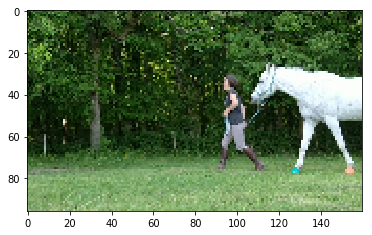

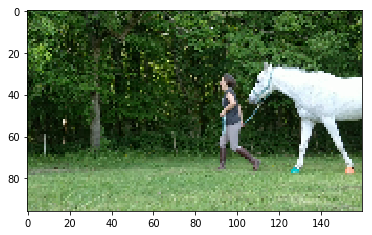

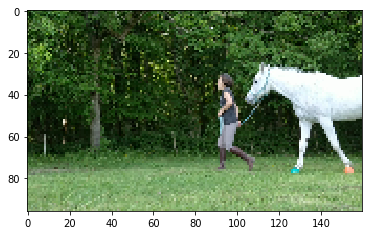

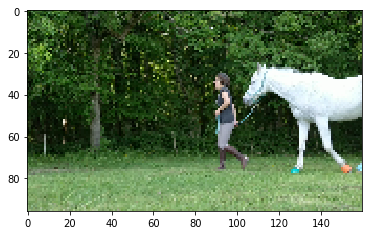

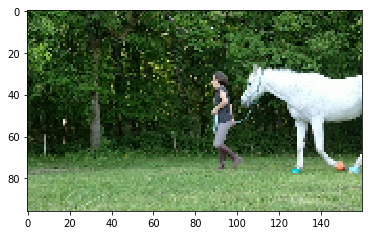

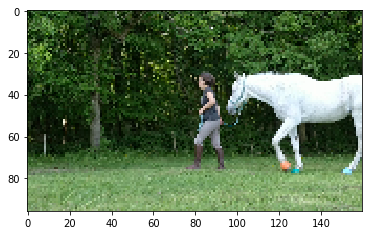

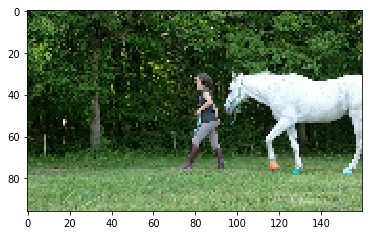

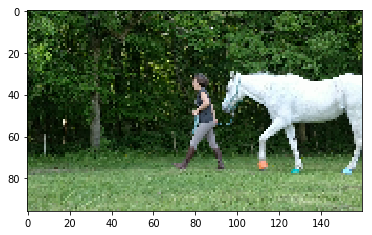

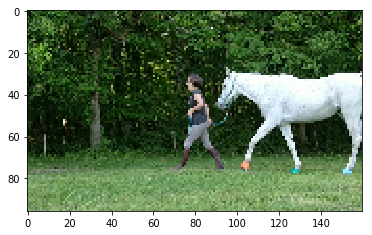

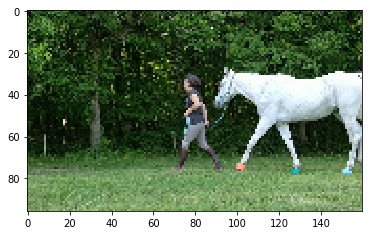

In [16]:
for image in images_seq[42]:
    fig, axes = plt.subplots()
    axes.imshow(image)

In [18]:
'''
Model from Patate42
'''

K.clear_session()
############################################################# 

img_in = Input(shape=(win_size, 96, 160, 3), name='img_in')
x = img_in

x = TimeDistributed(Convolution2D(2, (5,5), strides=(2,2), use_bias=False))(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = TimeDistributed(Convolution2D(4, (5,5), strides=(2,2), use_bias=False))(x)       
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)

x = TimeDistributed(Flatten(name='flattened'))(x)

x = LSTM(100, dropout=0.2, recurrent_dropout=0.2)(x)

x = Dense(100, use_bias=False)(x) 
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.4)(x)
x = Dense(50, use_bias=False)(x)  
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(.3)(x)

out_loc = Dense(labels_loc_seq.shape[1], activation='softmax')(x)


# Compile Model
model = Model(inputs=img_in, outputs=out_loc)
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img_in (InputLayer)          (None, 10, 96, 160, 3)    0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 46, 78, 2)     150       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 46, 78, 2)     8         
_________________________________________________________________
activation_1 (Activation)    (None, 10, 46, 78, 2)     0         
_________________________________________________________________
time_distributed_2 (TimeDist (None, 10, 21, 37, 4)     200       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 21, 37, 4)     16        
_________________________________________________________________
activation_2 (Activation)    (None, 10, 21, 37, 4)     0         
__________

In [31]:
model_name="model_RNN.h5"

In [32]:
#save best model if model improved
best_checkpoint = keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [33]:
h = model.fit(images_seq, labels_loc_seq, batch_size=16, epochs=10, validation_split=0.2, verbose=1, callbacks=[best_checkpoint])

Train on 227 samples, validate on 57 samples
Epoch 1/10
227/227 [==============================] - 21s 93ms/step - loss: 1.3014 - acc: 0.4493 - val_loss: 0.8978 - val_acc: 0.6667

Epoch 00001: val_loss improved from inf to 0.89775, saving model to model_RNN.h5
Epoch 2/10
227/227 [==============================] - 19s 85ms/step - loss: 0.8071 - acc: 0.7181 - val_loss: 2.2040 - val_acc: 0.2982

Epoch 00002: val_loss did not improve
Epoch 3/10
227/227 [==============================] - 19s 85ms/step - loss: 0.6361 - acc: 0.8018 - val_loss: 1.6738 - val_acc: 0.4211

Epoch 00003: val_loss did not improve
Epoch 4/10
227/227 [==============================] - 19s 85ms/step - loss: 0.6077 - acc: 0.8150 - val_loss: 1.7000 - val_acc: 0.2982

Epoch 00004: val_loss did not improve
Epoch 5/10
227/227 [==============================] - 20s 88ms/step - loss: 0.5519 - acc: 0.8018 - val_loss: 1.6570 - val_acc: 0.2982

Epoch 00005: val_loss did not improve
Epoch 6/10
227/227 [===========================

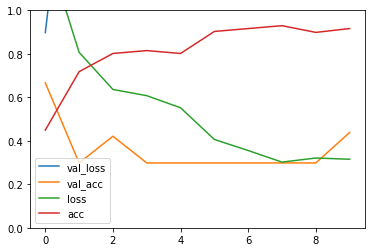

In [34]:
#print History graph
historydf = pd.DataFrame(h.history, index=h.epoch)
historydf.plot(ylim=(0,1))